# Ford GoBike System Data Exploration



## Introduction 

<b>this data set includes information about individual rides made in a bike-sharing system Bay area.



<a id="Extract"></a>
<div class="alert alert-block alert-info">
   

- Regarding for data analysis cource there are  five steps of the data analysis process:

    - **Extract**  
    -  **Clean**  
    - **Explore**  
    - **explanatory visuals**
    - **Share** - Here is where expl**an**atory visuals live.
    
    </p>

<a id="Extract"></a>
<div class="alert alert-block alert-info">
    <p><b>Extract Data
</p>

### below the link of the dataset 
https://www.lyft.com/bikes/bay-wheels/system-data
201903-fordgobike-tripdata.csv

| N | Feature | Description |
| :- | -: | :-: |
| 1 | duration_sec |time of the trip in second|
| 2 | start_time  |the date and the time the trip started |
| 3 | end_time |the date and the time the trip end up.|
| 4 | start_station_id |id of station.|
| 5 | start_station_name |the station name when the trip started.|
| 6 | start_station_latitude | horizontal line  Latitude that read first.|
| 7 | start_station_longitude | vertical line  Latitude that read second.|
| 8 | end_station_id |id of the end_station|
| 9 | end_station_name |Name of the end station|
| 10 | end_station_latitude | end horizontal line  Latitude that read firs|
| 11 | end_station_longitude |end vertical line  Latitude that read second |
| 12 | bike_id | id of bike |
| 13 | user_type |customer or subscriber|
| 14 | bike_share_for_all_trip	 |which tracks members who are enrolled in the Bike Share for All program for low-income residents|


 ### Latitude , longitude

<b>Geographical information system the earth is divided up into 
horizontal line  Latitude and 
vertical lines of longitude 
latitude and longitude is a coordinate system that is used for locating
any place on the globe.

In [1]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as tick
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv('fordgobike-tripdata.csv')

view the shape of the data how many rows and features and print the data type format for each feature 

In [4]:
print(bike_df.shape)
print(bike_df.dtypes)

(256299, 14)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object


<b>as i see this data_type not match the real because the start time is date data_type and this appear as object so we need to conert it the true data type 

In [5]:
bike_df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,53588,2019-03-31 20:59:21.8780,2019-04-01 11:52:30.2000,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,6803,Subscriber,No
1,74305,2019-03-31 13:56:46.0050,2019-04-01 10:35:11.4540,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,6415,Subscriber,No
2,79789,2019-03-31 11:48:34.2010,2019-04-01 09:58:23.8240,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,345.0,Hubbell St at 16th St,37.766483,-122.398279,2317,Customer,No


 
<a id="Extract"></a>
<div class="alert alert-block alert-info">
    <b>Cleaning data
       
        - check for Null Values 
        - check for any duplicated values 
        - data formatting 
        
</p>

check for any null values to remove it 

In [6]:
bike_df.isnull().sum()


duration_sec                 0
start_time                   0
end_time                     0
start_station_id           221
start_station_name         221
start_station_latitude       0
start_station_longitude      0
end_station_id             221
end_station_name           221
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
bike_share_for_all_trip      0
dtype: int64

<b>One interesting way we can apply bar charts is through the visualization of missing data. We can use pandas functions to create a table with the number of missing values in each column.

- i used seaborn lib to view bar chart the count of null values 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

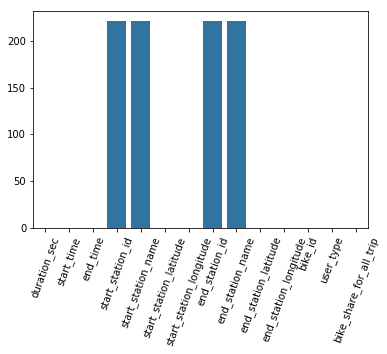

In [7]:
na_bike=bike_df.isna().sum()
base_color=sb.color_palette()[0]
sb.barplot(na_bike.index.values,na_bike,color=base_color)
plt.xticks(rotation=70)

In [8]:
bike_df.dropna(inplace=True)

In [9]:
bike_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

<b>so now my dataset is clear so i will check for any duplicated values 

In [10]:
bike_df.duplicated().sum()


0

In [11]:
# verify the dataset if all changes are done
bike_df.nunique()

duration_sec                 6382
start_time                 256059
end_time                   256057
start_station_id              346
start_station_name            346
start_station_latitude        346
start_station_longitude       346
end_station_id                346
end_station_name              346
end_station_latitude          346
end_station_longitude         346
bike_id                      4397
user_type                       2
bike_share_for_all_trip         2
dtype: int64

<b>so now t will check for the number of the rows after cleaning null values 

In [12]:
bike_df.shape

(256078, 14)

<b>now i will desribe the data to make basic statistical to see what 

In [13]:
bike_df.describe()


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,256078.000000,256078.000000,256078.000000,256078.000000,256078.000000,256078.000000,256078.000000,256078.000000
mean,807.514433,141.352424,37.772084,-122.356520,140.011317,37.772249,-122.356172,4917.236252
std,2055.470957,115.408300,0.096473,0.114313,115.386716,0.096422,0.114024,1687.915177
min,61.000000,3.000000,37.315158,-122.453704,3.000000,37.315158,-122.453704,11.000000
25%,338.000000,47.000000,37.770083,-122.415204,44.000000,37.770407,-122.413004,4531.000000
50%,541.000000,104.000000,37.780955,-122.398870,102.000000,37.781010,-122.398525,5371.000000
75%,854.000000,240.000000,37.797280,-122.293528,239.000000,37.797320,-122.293528,6127.000000
max,85676.000000,407.000000,37.880222,-121.874119,407.000000,37.880222,-121.874119,7082.000000


Now i will convert the datatype of the feature not acceptual formatting like 
	
| N | Feature | Correct Data_Type  |
| :- | -: | :-: |
| 1 | start_time |Date and Time |
| 2 | end_time  |Date and Time |
| 3 | user_type |Categorical|
| 4 | bike_share_for_all_trip |Categorical|

In [14]:
bike_df.start_time = pd.to_datetime(bike_df.start_time)
bike_df.end_time = pd.to_datetime(bike_df.end_time)

In [15]:
bike_df.user_type = bike_df.user_type.astype('category')
bike_df.bike_share_for_all_trip = bike_df.bike_share_for_all_trip.astype('category')

In [16]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256078 entries, 0 to 256298
Data columns (total 14 columns):
duration_sec               256078 non-null int64
start_time                 256078 non-null datetime64[ns]
end_time                   256078 non-null datetime64[ns]
start_station_id           256078 non-null float64
start_station_name         256078 non-null object
start_station_latitude     256078 non-null float64
start_station_longitude    256078 non-null float64
end_station_id             256078 non-null float64
end_station_name           256078 non-null object
end_station_latitude       256078 non-null float64
end_station_longitude      256078 non-null float64
bike_id                    256078 non-null int64
user_type                  256078 non-null category
bike_share_for_all_trip    256078 non-null category
dtypes: category(2), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 25.9+ MB


### tidy format
- start_time include the dd-mm-yyyy and time 00:00:00 
- so we can extract day and month and years for separate coloumn also the time to 

now i will splite more coloumn like day and month and year and specific day to make deep analysis

In [17]:
bike_df['year']=bike_df['start_time'].dt.strftime('%y')
bike_df['month']=bike_df['start_time'].dt.strftime('%B')
bike_df['day']=bike_df['start_time'].dt.strftime('%d')
bike_df['specific_day']=bike_df['start_time'].dt.strftime('%a')
bike_df['hour']=bike_df['start_time'].dt.hour

In [18]:
bike_df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,year,month,day,specific_day,hour
0,53588,2019-03-31 20:59:21.878,2019-04-01 11:52:30.200,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,6803,Subscriber,No,19,March,31,Sun,20
1,74305,2019-03-31 13:56:46.005,2019-04-01 10:35:11.454,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,6415,Subscriber,No,19,March,31,Sun,13
2,79789,2019-03-31 11:48:34.201,2019-04-01 09:58:23.824,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,345.0,Hubbell St at 16th St,37.766483,-122.398279,2317,Customer,No,19,March,31,Sun,11


<b>after extract new features from start_time i will drop this coloumn i not need it now 

<b>drop start_time

In [19]:
bike_df.drop('start_time',axis='columns', inplace=True)

In [20]:
bike_df.shape

(256078, 18)

In [21]:
bike_df.head(2)

,duration_sec,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,year,month,day,specific_day,hour
0,53588,2019-04-01 11:52:30.200,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,6803,Subscriber,No,19,March,31,Sun,20
1,74305,2019-04-01 10:35:11.454,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,6415,Subscriber,No,19,March,31,Sun,13


### What is the structure of your dataset?

<b>Originally there were approx. 256299 bike rides , 14 features about:

| N | Feature | Description |
| :- | -: | :-: |
| 1 | duration_sec |time of the trip in second|
| 2 | start_time  |the date and the time the trip started |
| 3 | end_time |the date and the time the trip end up.|
| 4 | start_station_id |id of station.|
| 5 | start_station_name |the station name when the trip started.|
| 6 | start_station_latitude | horizontal line  Latitude that read first.|
| 7 | start_station_longitude | vertical line  Latitude that read second.|
| 8 | end_station_id |id of the end_station|
| 9 | end_station_name |Name of the end station|
| 10 | end_station_latitude | end horizontal line  Latitude that read firs|
| 11 | end_station_longitude |end vertical line  Latitude that read second |
| 12 | bike_id | id of bike |
| 13 | user_type |customer or subscriber|
| 14 | bike_share_for_all_trip	 |which tracks members who are enrolled in the Bike Share for All program for low-income residents|

### What is/are the main feature(s) of interest in your dataset?
I'm most interested duration_sec to know what the specific time spend on each trip and we can compare it with another feature like the extraction feature i do above so this very interesting feature for me  
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
i expect the duration time start_time which i splite it into four coloumn to make deep specification to make good analysis
also bike_share_for_all_trip to also user_type




<div class="alert alert-block alert-info">
    <b><h1>Univariate Exploration</h1>
        as we learn from the course the definition of the Univariate Exploration
<p>we can build an intuition for how each variable is distributed before moving on to more complicated interaction between variables. wehat is the variables that will be key to answering your research questions if we observe any oddities in the data such as outliers, or missing values this
can point us to areas where we need to do more cleaning or otherwise perform further inspection it often makes sense to integrate this part of the exploration process into parts of the data wrangling process</p>
        
so as we do that above now i will focus to make univariate for each feature i interseted like i mention above 
- duration_sec 
- year
- month
- day
- specific day
- hour
- user_type                 
- bike_share_for_all_trip 

### but as i follow the dataset is one month focus on the March

<b>Regarding for the hist we can see first fig and we need to zoom on the distribution values to exclude outlier and focus for the dtribution 

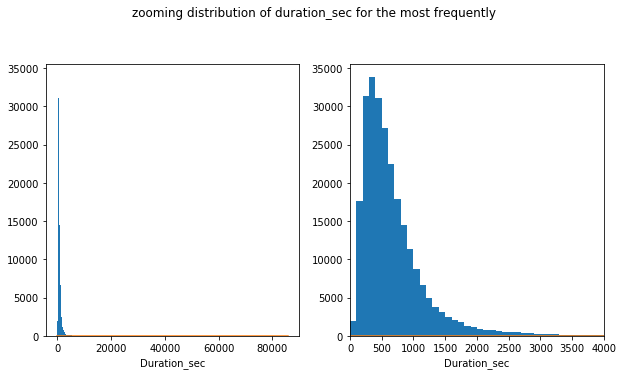

In [73]:
plt.figure(figsize = [10, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0,bike_df['duration_sec'].max()+1,100)
plt.hist(data = bike_df, x = 'duration_sec', bins = bin_edges)
sb.distplot(bike_df['duration_sec'],bins=bin_edges,kde=True,hist_kws={'alpha':0.75})
plt.xlabel('Duration_sec');

# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
bin_edges = np.arange(0,bike_df['duration_sec'].max()+1,100)
plt.hist(data = bike_df, x = 'duration_sec', bins = bin_edges)
plt.xlim(0, 4000)
sb.distplot(bike_df['duration_sec'],bins=bin_edges,kde=True,hist_kws={'alpha':0.75})
plt.suptitle("zooming distribution of duration_sec for the most frequently ", y = 1.04);
plt.xlabel('Duration_sec');

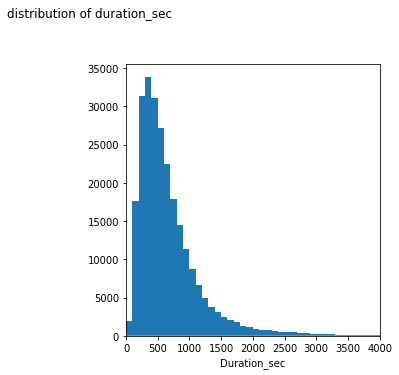

In [71]:
plt.figure(figsize = [10, 5])

# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
bin_edges = np.arange(0,bike_df['duration_sec'].max()+1,100)
plt.hist(data = bike_df, x = 'duration_sec', bins = bin_edges)
plt.xlim(0, 4000)
sb.distplot(bike_df['duration_sec'],bins=bin_edges,kde=True,hist_kws={'alpha':0.75})
plt.suptitle("distribution of duration_sec ", y = 1.04);
plt.xlabel('Duration_sec');

In [24]:
bike_df['duration_sec'].describe()

count    256078.000000
mean        807.514433
std        2055.470957
min          61.000000
25%         338.000000
50%         541.000000
75%         854.000000
max       85676.000000
Name: duration_sec, dtype: float64

<b>Regarding for the  most duration into 3000sec around 50 minute and the mean of that around 807.51 sec 13.45 minute and short trip around 1 minute and 

<b>from monday to friday is the highest number because all this days of work but sat and sun the days off for employee
and the highest one is friday 

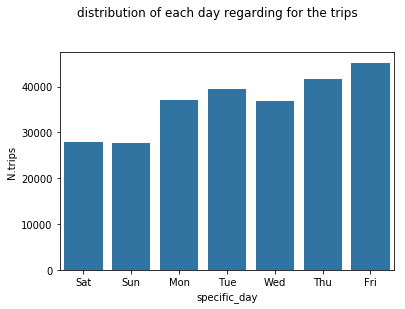

In [70]:
level_order=['Sat','Sun','Mon','Tue','Wed','Thu','Fri']
ordered_bike=pd.api.types.CategoricalDtype(ordered=True,categories=level_order)
bike_df['specific_day']=bike_df['specific_day'].astype(ordered_bike)
base_color=sb.color_palette()[0]
sb.countplot(data=bike_df,x='specific_day',color=base_color);
plt.suptitle("distribution of each day regarding for the trips  ", y = 1.04);
plt.xlabel('specific_day');
plt.ylabel('N.trips');

<b>so  show the text ratio of the frequency of the day per trip 

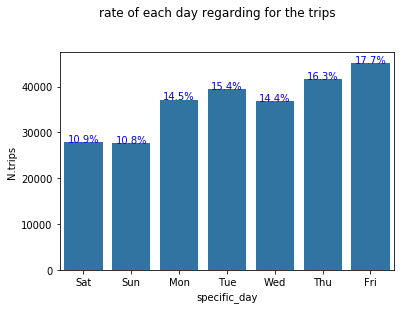

In [68]:
base_color=sb.color_palette()[0]
sb.countplot(data=bike_df,x='specific_day',color=base_color);
n_points=bike_df.shape[0]
bike_counts=bike_df['specific_day'].value_counts()
locs,labels=plt.xticks()
for loc,label in zip(locs,labels):
    count=bike_counts[label.get_text()]
    bike_string='{:0.1f}%'.format(100*count/n_points)
    plt.text(loc,count-8,bike_string,ha='center',color='b')
    plt.suptitle("rate of each day regarding for the trips  ", y = 1.04);
    plt.xlabel('specific_day');
    plt.ylabel('N.trips');

<b>The hourly distribution is bimodal, the system is used mainly around 8-9am and 5-6pm when people get to and gat back from work.

-  hourly usege of the bike sharing system to know what the specific time we need to know to puch more offer on it to make a good motovition 


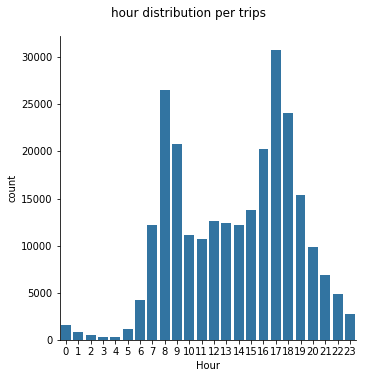

In [67]:
sb.catplot(data=bike_df, x='hour', kind='count', color = base_color);
plt.suptitle("hour distribution per trips ", y = 1.04);
plt.xlabel('Hour');

below the same above but appear only area under curve 

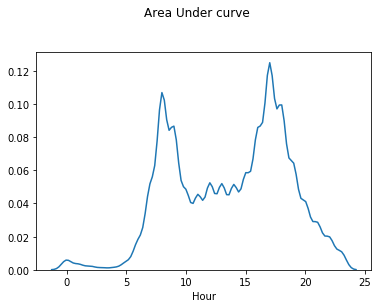

In [66]:
bin_edges = np.arange(0,bike_df['hour'].max()+1,100)
sb.distplot(bike_df['hour'],bins=bin_edges,kde=True,hist_kws={'alpha':0.75})
plt.suptitle("Area Under curve ", y = 1.04);
plt.xlabel('Hour');
    

<b>I used the kde to see the area under curve and see the high  peak points 

<b>regarding for this figure we can see subscriber is higher higher than customer that prove most of trips depend on the biker how payed to subscribe who is prove most of revenue effects by number of subscribers as we see above 

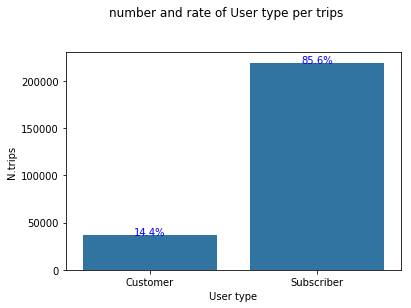

In [64]:

base_color=sb.color_palette()[0]
sb.countplot(data=bike_df,x='user_type',color=base_color);
bike_counts=bike_df['user_type'].value_counts()
locs,labels=plt.xticks()
for loc,label in zip(locs,labels):
    count=bike_counts[label.get_text()]
    bike_string='{:0.1f}%'.format(100*count/n_points)
    plt.text(loc,count-8,bike_string,ha='center',color='b')
    plt.suptitle("number and rate of User type per trips ", y = 1.04);
    plt.xlabel('User type');
    plt.ylabel('N.trips')

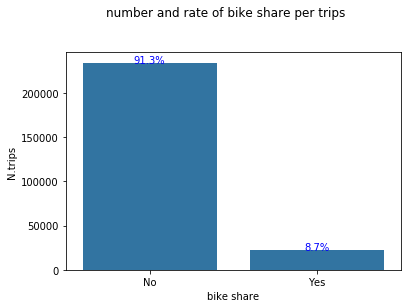

In [63]:
base_color=sb.color_palette()[0]
sb.countplot(data=bike_df,x='bike_share_for_all_trip',color=base_color);
bike_counts=bike_df['bike_share_for_all_trip'].value_counts()
locs,labels=plt.xticks()
for loc,label in zip(locs,labels):
    count=bike_counts[label.get_text()]
    bike_string='{:0.1f}%'.format(100*count/n_points)
    plt.text(loc,count-8,bike_string,ha='center',color='b')
    plt.suptitle("number and rate of bike share per trips ", y = 1.04);
    plt.xlabel('bike share');
    plt.ylabel('N.trips')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
There was one unusal points for the duration_sec,because after 2500 sec around 41.6 minute i see little number apprear also the beging hour of the day at am between 1 am to 6 am  also the number of has  bike_share_for_all_trip is very low

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was one unusal distribution for the duration_sec after 2500 no more long trip very little number 


<div class="alert alert-block alert-info">
    <b><h1>Bivariate Exploration</h1>
<p>
Bivariate visualizations are those that involve two variables we use bivariate visualizations to look at relationships when we change the level or value
</p>

	
| N | Type-1 |Type-2  |  relationshipstype  |
| :- | -: | :-: |:-: |
| 1 | quantitative |quantitative |Scatter plots
| 2 | quantitative  |Qualitative |Violin plots
| 3 | Qualitative |Qualitative| Clustered bar charts


<B>quantitative VS Qualitative
- user_type & duration_sec

<b>AS We see  user type per hour trip there are most time between 600-1400  sec on the customer and the subscriber between (200-800) SO THE CUSTOMER trips make trips long time than the subscriber

Text(0, 0.5, 'duration sec')

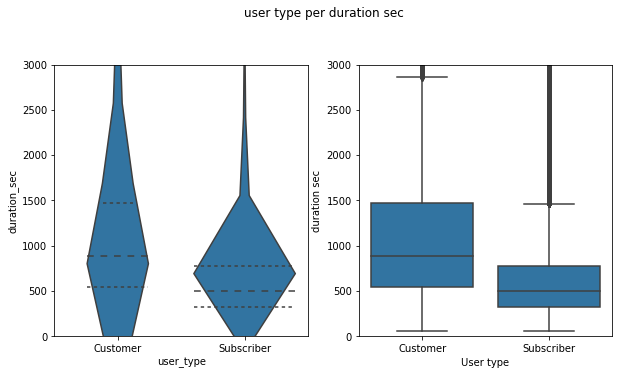

In [59]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
# left plot: violin plot
plt.subplot(1, 2, 1)
plt.ylim(0, 3000)
ax1 = sb.violinplot(data =  bike_df, x = 'user_type', y = 'duration_sec', color = base_color,inner = 'quartile')
# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data =  bike_df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim(ax1.get_ylim())
plt.suptitle("user type per duration sec", y = 1.04);
plt.xlabel('User type');
plt.ylabel('duration sec')

<b>  the customer has more trips on the saturday and sunday and for the subscriber we see all days high rate exept the vacation day because all subscriber are employees so they work all days exept the vacation days 

Text(0, 0.5, 'frequently appear')

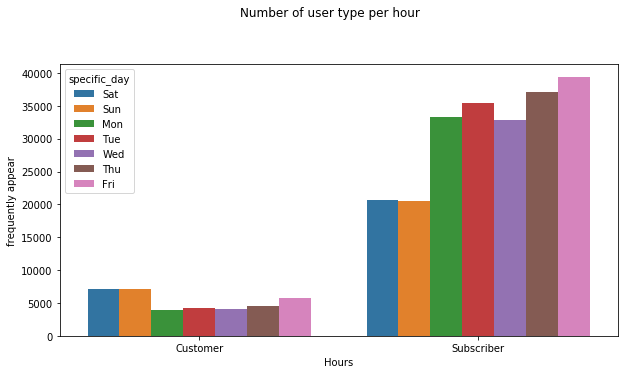

In [62]:
plt.figure(figsize = [10, 5])
sb.countplot(data = bike_df, x = 'user_type', hue = 'specific_day');
plt.suptitle("Number of user type per hour", y = 1.04);
plt.xlabel('Hours');
plt.ylabel('frequently appear')

 8 am and 5 pm is a higher time appear because this date for depature aand return from works 
and also the time of early after 6 am is rar to find ant trips 

Text(0, 0.5, 'frequently appear')

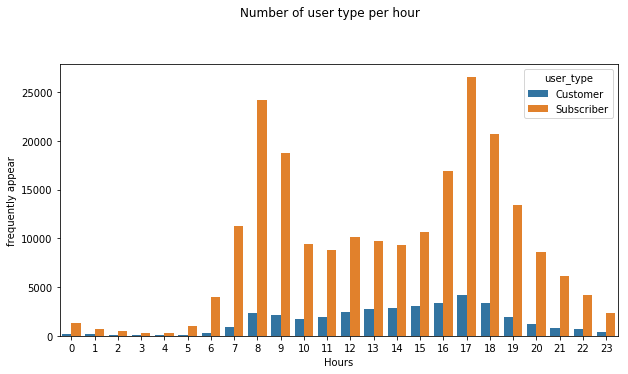

In [58]:
plt.figure(figsize = [10, 5])
sb.countplot(data = bike_df, x = 'hour', hue = 'user_type');
plt.suptitle("Number of user type per hour", y = 1.04);
plt.xlabel('Hours');
plt.ylabel('frequently appear')

<b> big gab between bike_share_for_all_trip approved and not approved 

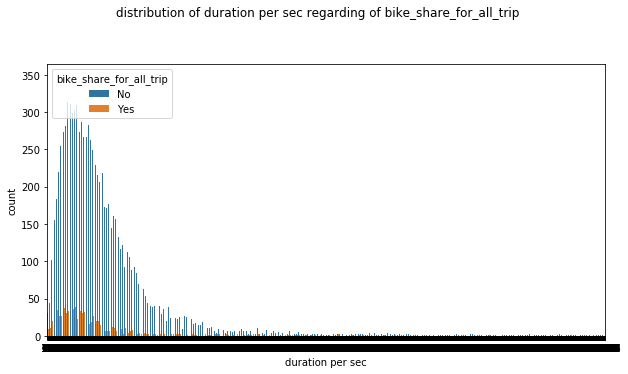

In [57]:
plt.figure(figsize = [10, 5])
sb.countplot(data = bike_df, x = 'duration_sec', hue = 'bike_share_for_all_trip');
plt.suptitle("distribution of duration per sec regarding of bike_share_for_all_trip", y = 1.04);
plt.xlabel('duration per sec');


In [75]:
plot2=bike_df.groupby(['user_type','bike_share_for_all_trip']).bike_share_for_all_trip.agg(['count'])
print(plot2)


                                     count
user_type  bike_share_for_all_trip        
Customer   No                        36890
Subscriber No                       196861
           Yes                       22327


<b>any type of user as customer not has any bike_share_for_all_trip because so that is logic case how customer deserve bike_share_for_all_trip
so we found the some subscribers deserve that and also that is logic because this type of userه is Permanent and paid monthly subscription 

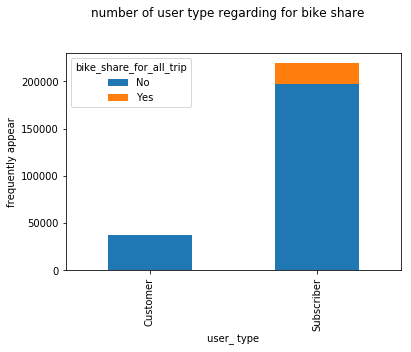

In [77]:
bike_df.groupby(['user_type','bike_share_for_all_trip']).size().unstack().plot(kind='bar',stacked=True)

plt.suptitle("number of user type regarding for bike share", y = 1.04);
plt.xlabel('user_ type');
plt.ylabel('frequently appear');

<b>the figure  show the number of trips per day regarding the user_type so we see days dows is days appear on vacation day (sat-sun days)also we see the number of subscriber higher number per day 

Text(0, 0.5, 'duration_sec')

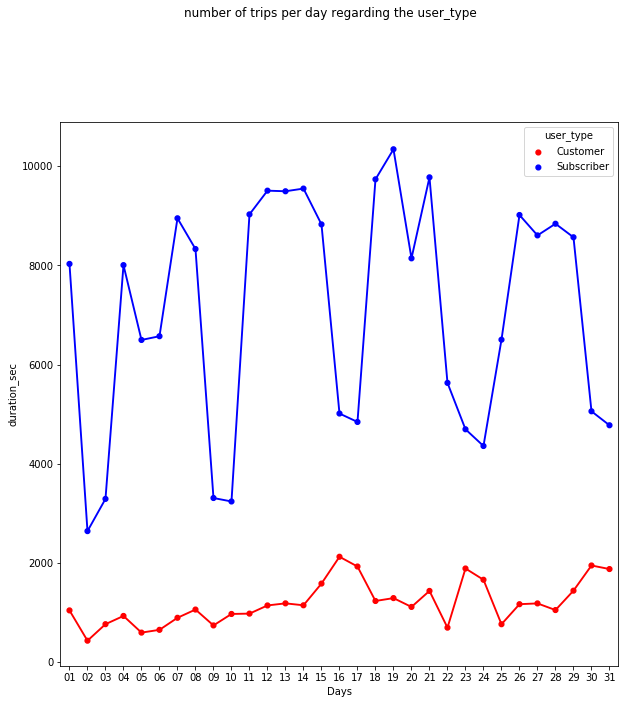

In [78]:
usertype_count= bike_df.groupby(["day", "user_type"]).size().reset_index()
plt.figure(figsize=(10,10))
colors = {'Subscriber':'blue', 'Customer':'red'}
sb.pointplot(x='day', y=0, hue='user_type', palette=colors, scale=.7, data=usertype_count);
plt.suptitle("number of trips per day regarding the user_type", y = 1.04);
plt.xlabel('Days')
plt.ylabel('duration_sec')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

the relationships observed in this part of the investigation the user_type because in this feature i really know more information when i test this feature in univariate visualizaion and bivariate and multivariate visualization so in univariate i know the most frequesny appear is the subscribers more than customer and on biviaraite i compare and make corroletion co-effection between between this feature (categorical and some features like numerical featurs and categorical feature so i used barchar to make this investigation and retreive more information from this relations like in the time using i found most of them not more than 30 min and most frequent appear on the morining when they went to work and the time of return back from the work 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
i extract the year and month and days and hour and specific days  from the strart time for the trip 


<div class="alert alert-block alert-info">
    <b><h1>Multivariate Exploration</h1>
<p>

</p>

<b>number of bike share on the time duration per hour this appear more number not have bike share and also
    more duration time take the trip 

<Figure size 720x360 with 0 Axes>

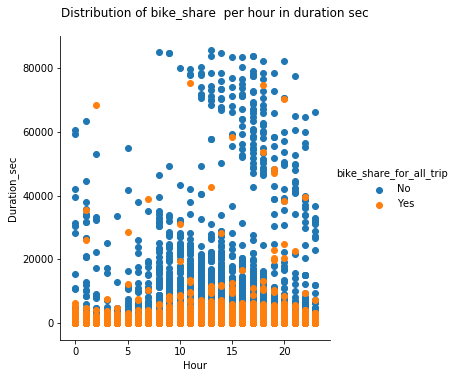

In [80]:
plt.figure(figsize = [10, 5]);
g = sb.FacetGrid(data = bike_df, hue = 'bike_share_for_all_trip', size = 5);
g.map(plt.scatter, 'hour', 'duration_sec');
g.add_legend();

plt.suptitle("Distribution of bike_share  per hour in duration sec", y = 1.04);
plt.xlabel('Hour');
plt.ylabel('Duration_sec');

<Figure size 720x720 with 0 Axes>

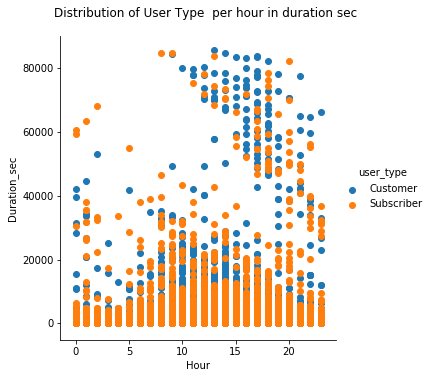

In [81]:
plt.figure(figsize=(10,10))
g = sb.FacetGrid(data = bike_df, hue = 'user_type', size = 5);
g.map(plt.scatter, 'hour', 'duration_sec');
g.add_legend()
plt.suptitle("Distribution of User Type  per hour in duration sec", y = 1.04);
plt.xlabel('Hour');
plt.ylabel('Duration_sec');

<b>as we see above subscriber appear more than customer 

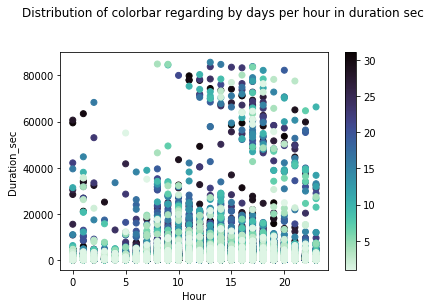

In [82]:
#another type to show FacetGrid the above relationship
plt.scatter(data = bike_df, x = 'hour', y = 'duration_sec', c = 'day',
            cmap = 'mako_r')
plt.colorbar()
plt.suptitle("Distribution of colorbar regarding by days per hour in duration sec", y = 1.04);
plt.xlabel('Hour');
plt.ylabel('Duration_sec');

### Polishing Plots
<b>regarding for the figure  on saturday and sundy is the high time duration because this employee vacation because remider the week normal checivement like goto work from monday to friday it the same rate although the customer make long trips

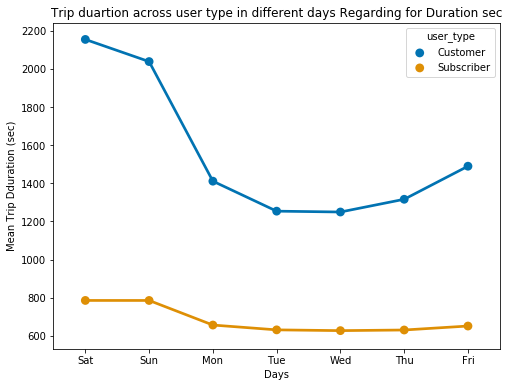

In [83]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = bike_df, x = 'specific_day', y = 'duration_sec', hue = 'user_type', palette = 'colorblind', ci=None)
plt.title('Trip duartion across user type in different days Regarding for Duration sec')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Days')
plt.show();

### below i will show the relationship between my interested three features 
- bike_share_for_all_trip
- duration_sec
- user_type

<b> and i will show that by three ways
- pointplot
- barplot
    
 <b>as wee see for the customer not stable rate some of peak pint and some down values of duration per sec but on subscriber we see from 9 am to 11 pm the same rate of time except the 1 am is the higher point on both user_type   
   -<b>as wee see customer make more trip and long time more than subscribers and we see down points on days vacations 

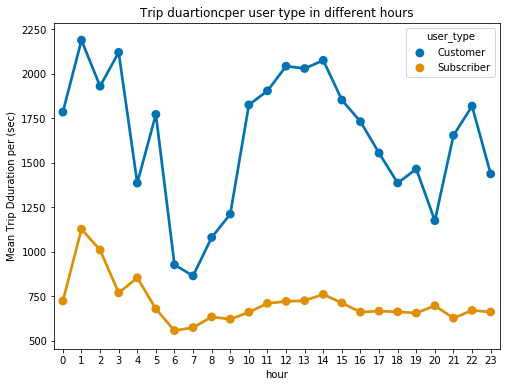

In [86]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = bike_df, x = 'hour', y = 'duration_sec', hue = 'user_type', palette = 'colorblind', ci=None)
plt.title('Trip duartioncper user type in different hours')
plt.ylabel('Mean Trip Dduration per (sec)')
plt.xlabel('hour')
plt.show();

<b>regarding for the figure we see no bike shae with customer and that is logic 

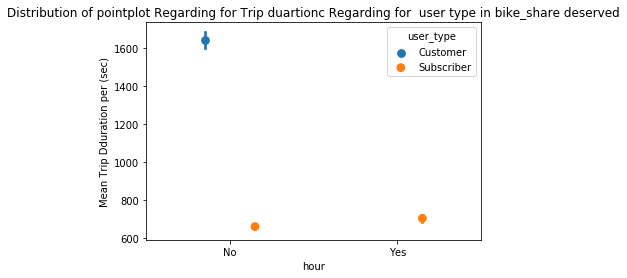

In [84]:
ax = sb.pointplot(data = bike_df, x = 'bike_share_for_all_trip', y = 'duration_sec', hue = 'user_type',
dodge = 0.3, linestyles = "")
plt.title('Distribution of pointplot Regarding for Trip duartionc Regarding for  user type in bike_share deserved')
plt.ylabel('Mean Trip Dduration per (sec)')
plt.xlabel('hour')
plt.show();

<b> all customer not have any bike share for all trips but subscriber deserve that but not all of them 

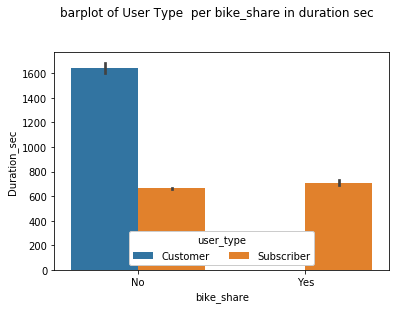

In [87]:
ax = sb.barplot(data = bike_df, x = 'bike_share_for_all_trip', y = 'duration_sec', hue = 'user_type');
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user_type')
plt.suptitle("barplot of User Type  per bike_share in duration sec", y = 1.04);
plt.xlabel('bike_share');
plt.ylabel('Duration_sec');

<b> the heatmap it apper the 705.914 sec(11.7 minute) number of subscriber has bike share for all trip so most of subscriber not take long trip either has bike share or not 

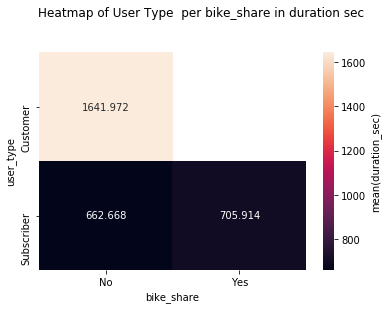

In [89]:
bike_means = bike_df.groupby(['bike_share_for_all_trip', 'user_type']).mean()['duration_sec']
bike_means = bike_means.reset_index(name = 'num_var2_avg')
bike_means = bike_means.pivot(index = 'user_type', columns = 'bike_share_for_all_trip',
                            values = 'num_var2_avg')
sb.heatmap(bike_means, annot = True, fmt = '.3f',cbar_kws = {'label' : 'mean(duration_sec)'});
plt.suptitle("Heatmap of User Type  per bike_share in duration sec", y = 1.04);
plt.xlabel('bike_share');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
i observed the strong relationship between bike_share_for_all_trip and duration_sec and user_type because we want to looking for how the duration time effective by user type and bike_share_for_all_trip and i observed time duration very high with custemor but they not has any permission to bike_share_for_all_trip chance so for subsciber have short trips but they used to bike_share_for_all_trip

### Were there any interesting or surprising interactions between features?
- duration_sec
- user_type
- day
- hour 
on the feature of the days ---->saturday and sundy is the high time duration because this employee vacation because remider the week normal checivement like goto work from monday to friday it the same rate although the customer make long trips
on the feature of the hours---->regarding for the figure before i see  the customer not stable rate some of peak pint and some down values of duration per sec but on subscriber we see from 9 am to 11 pm the same rate of time except the 1 am is the higher point on both user_type

- https://www.youtube.com/watch?v=lUMlmRzkuuY
- https://www.youtube.com/watch?v=MDRIXoZKEEo
- udacity course 

In [1]:
!conda update -y -c anaconda nbconvert

Solving environment: ...working... 


*** picosat: out of memory in 'resize'
